# Artificial Neural Network

### Importing the libraries

In [41]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [42]:
tf.__version__

'2.10.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [43]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [44]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [45]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding categorical data

Label Encoding the "Gender" column

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [47]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

In [48]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [49]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Splitting the dataset into the Training set and Test set

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [52]:
# bAccess the sequential layered model class 
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [53]:
# add input layer and hidden layer using 6 nodes, when it is the first layer added the library adds inputs fr you
# dense class adds a fully connected layer
# add 6 neurons"units" the activation function is the rectifier function "relu"
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [54]:
#repeat the steps above to add another "hidden" layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [56]:
# output layer uses sigmoid activation finction to produce a prediction between 0 and 1 a.k.a probability true/false
ann.add(tf.keras.layers.Dense(units=1, activation='hard_sigmoid'))


# Output layers can use different activation functions

# rectifier - numeric output
# sigmoid - binary
# threshold - binary
# tanh - numeric
# softmax - numeric

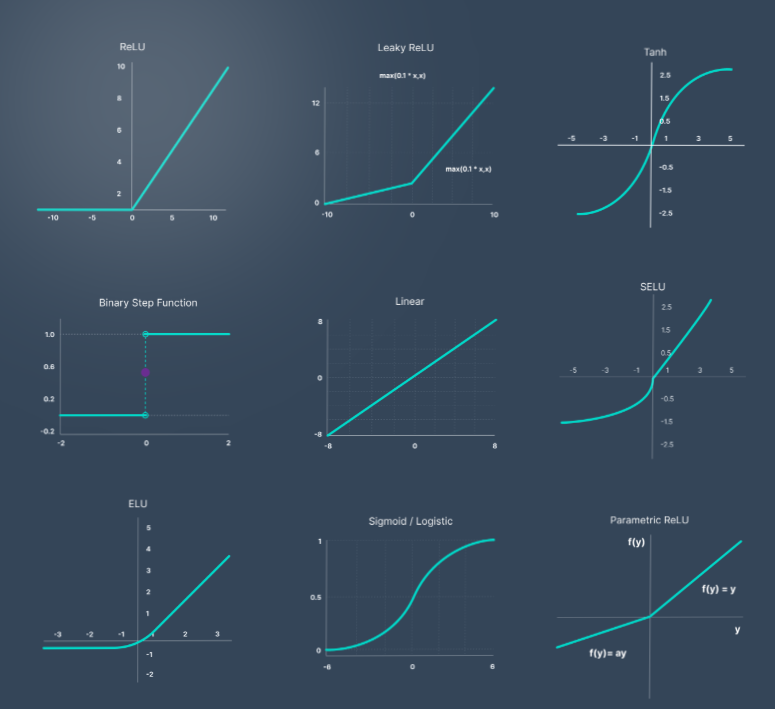

#### Common activation functions


## Part 3 - Training the ANN

### Compiling the ANN

In [70]:
# Compile the model/net set how cost(loss function) will be calculated, what metrics to show

# optimisers https://www.tensorflow.org/api_docs/python/tf/keras/optimizers many of them work through gradient descent
# loss functions available https://www.tensorflow.org/api_docs/python/tf/keras/losses

# cross entropy works for mutiple classes binary_crossentropy only works for binary outputs  

# pick the metric/metrics to optimise for https://www.tensorflow.org/api_docs/python/tf/keras/metrics
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy','Precision'])

### Training the ANN on the Training set

In [71]:
# set number of passes through the data(epochs)
# set how many large to make each batch in mini-batch gradient descent
ann.fit(X_train, y_train, batch_size = 5, epochs = 10)

Epoch 1/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.3865 - accuracy: 0.8518 - precision: 0.7234
Epoch 2/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.3686 - accuracy: 0.8520 - precision: 0.7338
Epoch 3/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.3723 - accuracy: 0.8529 - precision: 0.7407
Epoch 4/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.3801 - accuracy: 0.8529 - precision: 0.7444
Epoch 5/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.3682 - accuracy: 0.8521 - precision: 0.7381
Epoch 6/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.3689 - accuracy: 0.8520 - precision: 0.7290
Epoch 7/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.3663 - accuracy: 0.8522 - precision: 0.7363
Epoch 8/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.3691 - accuracy: 0.8528 - precision: 0.7326
Epoch 9/10
1600/1600 [==

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

**Homework**

Use our ANN model to predict if the customer with the following informations will leave the bank: 

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer ?

**Solution**

In [62]:
# use the model to predict True/False by comparing sigmoid output 0-1 to 0.5 

# ann.predict takes inputs similar to other ML methods you must apply the transform to the data before predicting.



print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]]))>0.5)

1/1 [==============================] - 0s 26ms/step
[[False]]


Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

### Predicting the Test set results

In [63]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 1ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

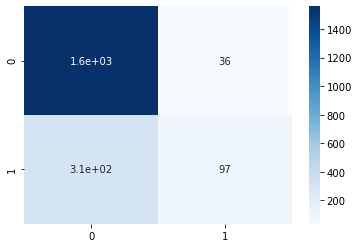

0.828

In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,cmap = 'Blues')
plt.show()
accuracy_score(y_test, y_pred)

https://www.superdatascience.com/blogs/the-ultimate-guide-to-artificial-neural-networks-ann

https://towardsdatascience.com/introduction-to-aic-akaike-information-criterion-9c9ba1c96ced